In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import plotly.express as px


In [ ]:
api_key = "Your API Key"
channel_ids = ["UCR9120YBAqMfntqgRTKmkjQ", #A24
              "UCvsU0EGXN7Su7MfNqcTGNHg", #Infobae
              "UCba3hpU7EFBSk817y9qZkiA", #La Nacion
              "UCFgk2Q2mVO1BklRQhSv6p0w", # C5N
              "UCj6PcyLvpnIRT_2W_mwa9Aw", #Todo Noticias (TN)
              "UCz489cQmrgH57sShDiatwfw"  #El Peluca Milei

]

youtube = build("youtube", "v3", developerKey=api_key)

Function to get channel statistic

In [ ]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= ','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):

      data = dict(Channel_name = response["items"][i]["snippet"]["title"],
                Subscribers = response["items"][i]["statistics"]['subscriberCount'],
                Views = response["items"][i]["statistics"]['viewCount'],
                Total_videos = response["items"][i]["statistics"]['videoCount'],
                playlist_id =  response["items"][i]["contentDetails"]['relatedPlaylists'] )

      all_data.append(data)

    return all_data

In [ ]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [ ]:
channel_data = pd.DataFrame(channel_statistics)

In [ ]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,LA NACION,3040000,2080168987,64921,"{'likes': '', 'uploads': 'UUba3hpU7EFBSk817y9q..."
1,C5N,2840000,1528755229,170363,"{'likes': '', 'uploads': 'UUFgk2Q2mVO1BklRQhSv..."
2,A24com,1960000,1252123433,41971,"{'likes': '', 'uploads': 'UUR9120YBAqMfntqgRTK..."
3,El Peluca Milei,1870000,717623128,1076,"{'likes': '', 'uploads': 'UUz489cQmrgH57sShDia..."
4,Todo Noticias,4480000,2134943063,53306,"{'likes': '', 'uploads': 'UUj6PcyLvpnIRT_2W_mw..."
5,Infobae,1270000,436308314,15740,"{'likes': '', 'uploads': 'UUvsU0EGXN7Su7MfNqcT..."


In [ ]:
channel_data["Subscribers"] = pd.to_numeric(channel_data["Subscribers"])
channel_data["Views"] = pd.to_numeric(channel_data["Views"])
channel_data["Total_videos"] = pd.to_numeric(channel_data["Total_videos"])
channel_data.dtypes

,0
Channel_name,object
Subscribers,int64
Views,int64
Total_videos,int64
playlist_id,object


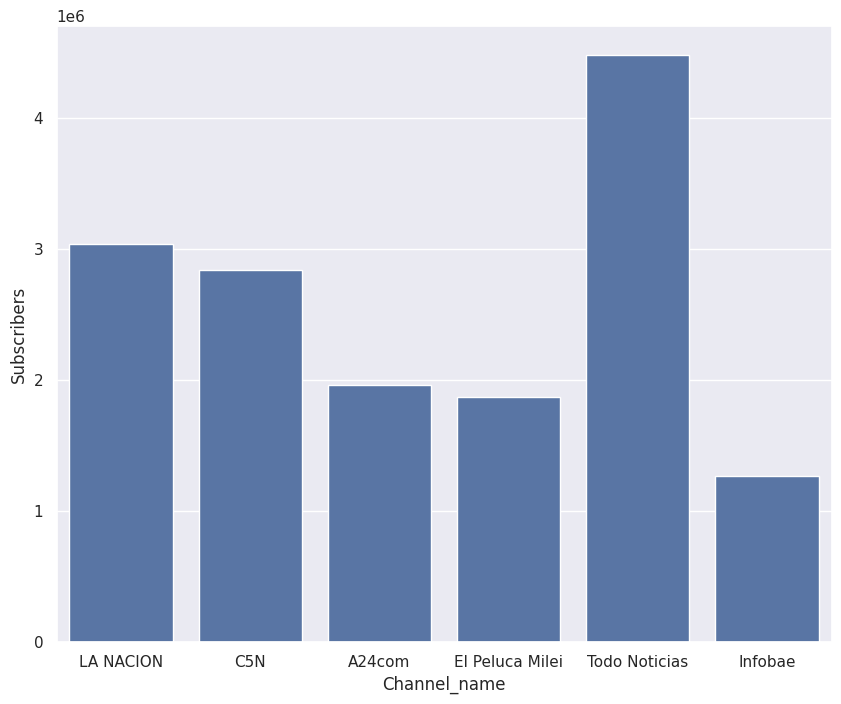

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x="Channel_name", y="Subscribers", data=channel_data)

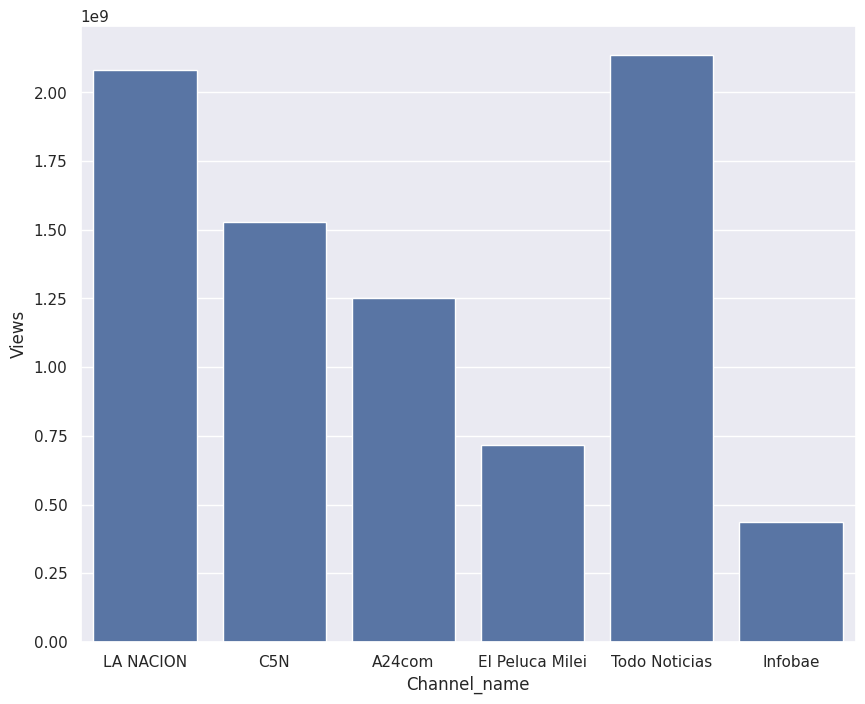

In [ ]:
ax = sns.barplot(x="Channel_name", y="Views", data=channel_data)

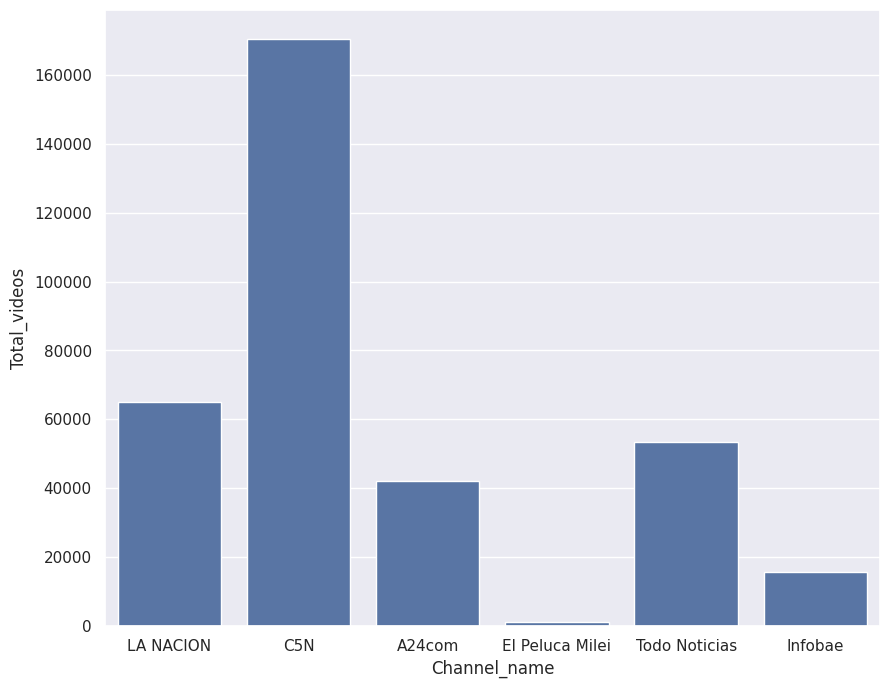

In [ ]:
ax = sns.barplot(x="Channel_name", y="Total_videos", data=channel_data)

Function to get video ids

In [ ]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,LA NACION,3040000,2080168987,64921,"{'likes': '', 'uploads': 'UUba3hpU7EFBSk817y9q..."
1,C5N,2840000,1528755229,170363,"{'likes': '', 'uploads': 'UUFgk2Q2mVO1BklRQhSv..."
2,A24com,1960000,1252123433,41971,"{'likes': '', 'uploads': 'UUR9120YBAqMfntqgRTK..."
3,El Peluca Milei,1870000,717623128,1076,"{'likes': '', 'uploads': 'UUz489cQmrgH57sShDia..."
4,Todo Noticias,4480000,2134943063,53306,"{'likes': '', 'uploads': 'UUj6PcyLvpnIRT_2W_mw..."
5,Infobae,1270000,436308314,15740,"{'likes': '', 'uploads': 'UUvsU0EGXN7Su7MfNqcT..."


In [ ]:
playlist_id = channel_data.loc[channel_data['Channel_name'] == 'LA NACION', 'playlist_id'].iloc[0]

In [ ]:
playlist_id = playlist_id['uploads']

In [ ]:
playlist_id

'UUba3hpU7EFBSk817y9qZkiA'

In [ ]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part="contentDetails",
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response["nextPageToken"]
    more_pages = True

    while more_pages:
      if next_page_token is None:
        more_pages = False
      else:
        request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_id,
            maxResults=50,
            pageToken = next_page_token)
        response = request.execute()

        for i in range(len(response['items'])):
            video_ids.append(response['items'][i]['contentDetails']['videoId'])

        next_page_token = response.get("nextPageToken")

    return video_ids


In [ ]:
video_ids = get_video_ids(youtube, playlist_id)

In [ ]:
video_ids

['VS_iMnGKSv4',
 '7eWtfJ3TVX8',
 'xICzXPwo3KM',
 'Sa2l59KFuRA',
 'ytOZGi9P-dU',
 '0fxEUOGu1y4',
 'rPxfOBJs4iQ',
 'dTTs1iKeRgQ',
 'oCVB_ESEcCk',
 'UPrXyVZBZo8',
 'mnS6P5iTpfE',
 'k4KX2_K31xs',
 '448D0wFu1XI',
 'rm3-k3dEWJU',
 'FDg_JlvhVbE',
 'mCms5eceKOo',
 'hexLDsP9AKY',
 'DR0eAER64rU',
 'hPoFXGOY0rY',
 'fldbjIIoqvo',
 'cQcGwcAPWqM',
 '1JpHU0sJxyo',
 'jJVsmOFl83g',
 'fJsKBtJQKC0',
 'O3-AIeR1d18',
 '6nw39ZYc49I',
 'iSyF-R29vRQ',
 'QLYt21-nCRs',
 'BEjUBJIzWvY',
 'u1Ld9e_WBPo',
 'BoR9eJsSkN4',
 '8QQOkRitJ6Q',
 '8vQ5mY0_etk',
 'ev6rOInWku0',
 'zNlxIAGuoow',
 'iBLTLTN2KRE',
 'EwHghrCSYvE',
 'SzKuOLg74bE',
 'O_7L9u5kgyU',
 'KDH-pJ8chsk',
 'JWZMLXcvbOY',
 'RbTv8D3cHg0',
 'SDuH5Q5mlJk',
 '8Lho1nfox6c',
 'kshAc51XVVA',
 'lHcBa4PAO4Y',
 'AWyR4g_1Pr8',
 'sLoivb-TzGo',
 'XHke4SmQdxM',
 'LITuKjAQy3I',
 'ZK8iu1W7Pag',
 'LvfZXNkZih4',
 'g4a5YdYbPpY',
 'jO72WnDLOJY',
 'E9HuSURdCwM',
 '_j_4u5YHx9M',
 'U_gMRQ-Q9kw',
 'qS8wymHWE5Q',
 'feSDPGzfwGY',
 'RL0x1eGbu20',
 'qrG772mpxLA',
 '66EfbMsY_8o',
 '_Shv0t

Function to get video details

In [ ]:
def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50]))
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics'].get('likeCount', 0),
                               Dislikes = video['statistics'].get('dislikeCount', 0),
                               Comments = video['statistics'].get('commentCount',0)
                               )
            all_video_stats.append(video_stats)

    return all_video_stats

In [ ]:
video_details = get_video_details(youtube, video_ids)

In [ ]:
video_data = pd.DataFrame(video_details)

In [ ]:
video_data["Published_date"] = pd.to_datetime(video_data["Published_date"]).dt.date
video_data["Views"] = pd.to_numeric(video_data["Views"])
video_data["Likes"] = pd.to_numeric(video_data["Likes"])
video_data["Dislikes"] = pd.to_numeric(video_data["Dislikes"])
video_data["Comments"] = pd.to_numeric(video_data["Comments"])
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,Kicillof denunció que Milei “se roba los recur...,2024-02-26,13376,187,0,423
1,Viva Hate (1988): el disco con el que Morrisse...,2024-06-27,489,18,0,3
2,"No hay plata, la batalla final; el editorial d...",2024-02-26,105477,2925,0,554
3,Asesinaron al dueño de una de las mansiones má...,2024-02-26,51037,598,0,120
4,Crean un diminuto robot que ayudaría a tratar ...,2024-02-26,828,20,0,0
...,...,...,...,...,...,...
10795,Cuidado con las aspiradoras de productividad,2023-11-28,55,2,0,0
10796,Hackeá el tiempo en tu oficina,2023-11-28,92,1,0,0
10797,No dejes para mañana lo que podés hacer hoy,2023-11-28,179,6,0,0
10798,Domá tus notificaciones para que no te dominen,2023-11-28,59,2,0,0


In [ ]:
top10_videos = video_data.sort_values(by="Views", ascending=False).head(10)

In [ ]:
top10_videos

,Title,Published_date,Views,Likes,Dislikes,Comments
7065,Extrema tensión: así fue el ataque del preso q...,2023-09-20,16200491,304583,0,7341
8853,Los gritos desgarradores de una vecina de Vill...,2023-08-03,5478691,121124,0,4535
1038,Insólito: entrevistaban a una vecina sobre rob...,2024-02-01,3534818,127251,0,3549
8313,La entrevista completa de Javier Milei con Jon...,2023-08-16,3272098,31122,0,4897
4807,Debate presidencial entre Sergio Massa y Javie...,2023-11-13,3103259,18984,0,1732
8728,Un hombre que escapaba desesperado de ladrones...,2023-08-07,2935922,57488,0,1625
6276,Detuvieron a arbolito con 400.000 dólares,2023-10-11,2924711,34442,0,973
3853,"""¿Por qué tenía que ser estatal?"" Diana Mondin...",2023-11-30,2642063,99700,0,6258
2567,"Javier Milei: ""Si me rechazan el DNU, llamaría...",2023-12-27,2067031,32751,0,7804
4814,"""¿Sabes que es el GDE""? la pregunta de Massa a...",2023-11-13,2030876,82749,0,4107


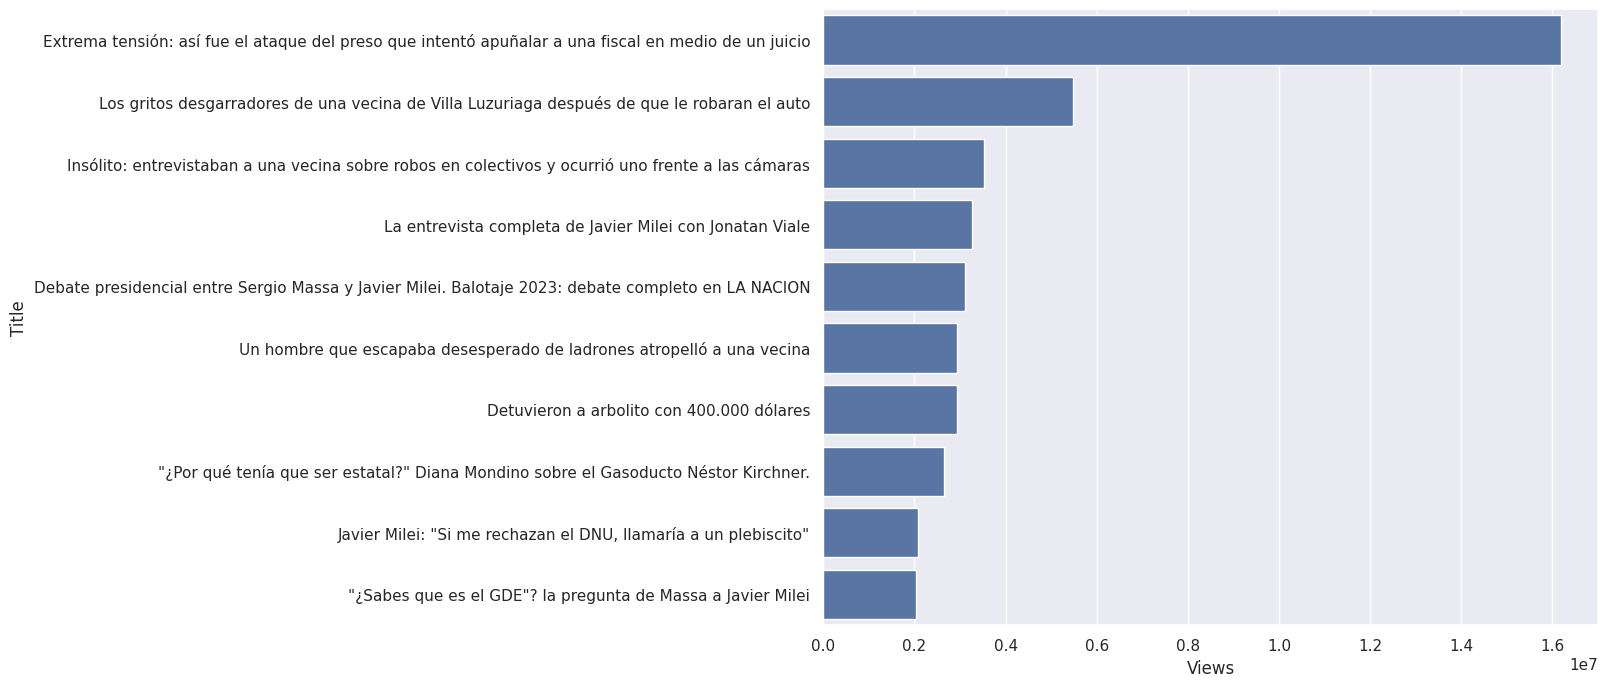

In [ ]:
ax1 = sns.barplot(x="Views", y="Title", data=top10_videos)

In [ ]:
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,Kicillof denunció que Milei “se roba los recur...,2024-02-26,13376,187,0,423
1,Viva Hate (1988): el disco con el que Morrisse...,2024-06-27,489,18,0,3
2,"No hay plata, la batalla final; el editorial d...",2024-02-26,105477,2925,0,554
3,Asesinaron al dueño de una de las mansiones má...,2024-02-26,51037,598,0,120
4,Crean un diminuto robot que ayudaría a tratar ...,2024-02-26,828,20,0,0
...,...,...,...,...,...,...
10795,Cuidado con las aspiradoras de productividad,2023-11-28,55,2,0,0
10796,Hackeá el tiempo en tu oficina,2023-11-28,92,1,0,0
10797,No dejes para mañana lo que podés hacer hoy,2023-11-28,179,6,0,0
10798,Domá tus notificaciones para que no te dominen,2023-11-28,59,2,0,0


In [ ]:
video_data["Month"] = pd.to_datetime(video_data["Published_date"]).dt.strftime("%b")

In [ ]:
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments,Month
0,Kicillof denunció que Milei “se roba los recur...,2024-02-26,13376,187,0,423,Feb
1,Viva Hate (1988): el disco con el que Morrisse...,2024-06-27,489,18,0,3,Jun
2,"No hay plata, la batalla final; el editorial d...",2024-02-26,105477,2925,0,554,Feb
3,Asesinaron al dueño de una de las mansiones má...,2024-02-26,51037,598,0,120,Feb
4,Crean un diminuto robot que ayudaría a tratar ...,2024-02-26,828,20,0,0,Feb
...,...,...,...,...,...,...,...
10795,Cuidado con las aspiradoras de productividad,2023-11-28,55,2,0,0,Nov
10796,Hackeá el tiempo en tu oficina,2023-11-28,92,1,0,0,Nov
10797,No dejes para mañana lo que podés hacer hoy,2023-11-28,179,6,0,0,Nov
10798,Domá tus notificaciones para que no te dominen,2023-11-28,59,2,0,0,Nov


In [ ]:
videos_per_month = video_data.groupby("Month", as_index=False).size()

In [ ]:
videos_per_month

,Month,size
0,Aug,1204
1,Dec,1496
2,Feb,1067
3,Jan,1360
4,Jul,1136
5,Jun,545
6,Nov,1663
7,Oct,1281
8,Sep,1048


In [ ]:
sort_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


In [ ]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month["Month"], categories=sort_order, ordered=True)

In [ ]:
videos_per_month = videos_per_month.sort_index()


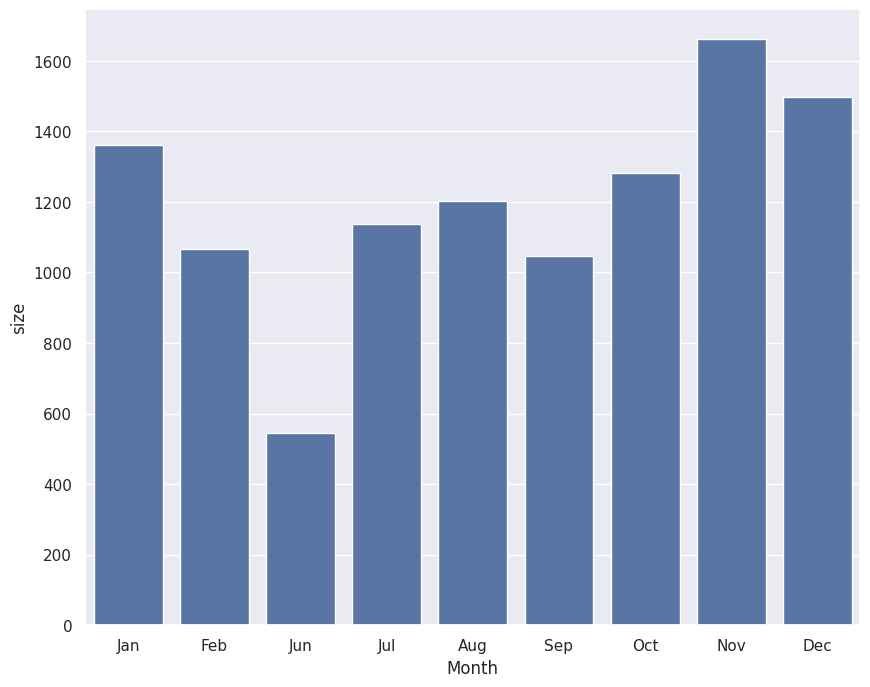

In [ ]:
ax2 = sns.barplot(x="Month", y="size", data=videos_per_month)